## Final Project Submission

Please fill out:
* Student name: Andrew Wester
* Student pace: Full Time
* Scheduled project review date/time: TBD
* Instructor name: Rafael Carrasco
* Blog post URL:


## Dataset: Diabetes 130-US hospitals for years 1999-2008 Data Set
**Abstract**: This data has been prepared to analyze factors related to readmission as well as other outcomes pertaining to patients with diabetes.

**Data Set Information:**
- The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

> 1) It is an inpatient encounter (a hospital admission).
>
> 2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
>
> 3) The length of stay was at least 1 day and at most 14 days.
>
> 4) Laboratory tests were performed during the encounter.
>
> 5) Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.


## Attribute Information:
**Input variables:**

Detailed description of all the atrributes is provided in Table 1 Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.

**_SEE IMAGE_**
<img src='table1a.png'>

In [2]:
import pandas as pd
import numpy as np

from IPython.display import Image
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.externals.six import StringIO
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score 
from sklearn.metrics import make_scorer, recall_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('diabetic_data.csv')
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [5]:
data.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

## Separate Features from Target Variable (Readmitted Column)

In [6]:
target = data.readmitted
features = data.drop(columns='readmitted')

In [7]:
print(features.shape)
features.head()

(101766, 49)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,No
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,No,Yes
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [8]:
print(target.shape)
target.head()

(101766,)


0     NO
1    >30
2     NO
3     NO
4     NO
Name: readmitted, dtype: object

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64


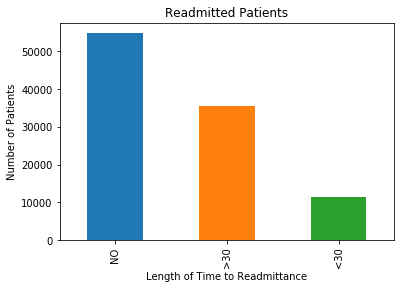

In [9]:
print(target.value_counts())
target.value_counts().plot(kind='bar')
plt.title('Readmitted Patients')
plt.xlabel('Length of Time to Readmittance')
plt.ylabel('Number of Patients');

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


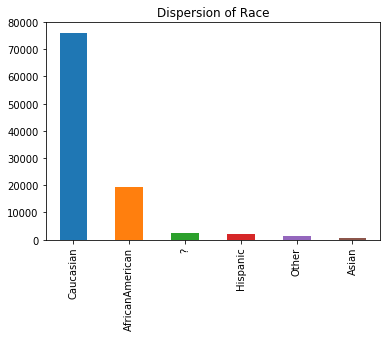

In [10]:
print(features.race.value_counts())
features.race.value_counts().plot(kind='bar')
plt.title('Dispersion of Race');

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


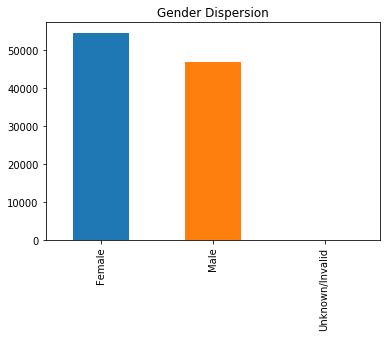

In [11]:
print(features.gender.value_counts())
features.gender.value_counts().plot(kind='bar')
plt.title('Gender Dispersion');

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


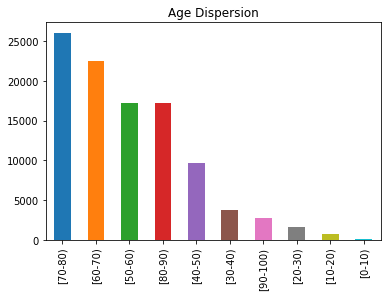

In [12]:
print((features.age.value_counts()))
features.age.value_counts().plot(kind='bar')
plt.title('Age Dispersion');